<h1> <center> CRIMINALS DATABASE PROJECT WITH MACHINE or DEEP LEARNING

___

<h2> OBJECTIVE

> <div class="alert alert-block alert-info">To create a database of criminals obtained from crime-news, and extract features such as criminal names, organisations, age, location and perform machine learning to categorize them according to their crime type.

<H3> DATA AVAILABILITY

The data for this project has been provided in xlsx format having variables such as parent_urls, sub_url, downloaded_date, common_kwd, filter_url_status, author_name, publish_date, body, image_link, keywords and summary.

<H3> PROJECT REQUIREMENT

1. To store the news in a database with the name of the criminal and name of the crime as
keywords.
2. To store the photo of the criminal in database if it is published in the news article.
3. To color the names of the criminals into black, red, blue and yellow, based on keywords
where the color indicates risk-type.
4. To develop a machine learning algorithm which can learn to identify duplicate names and
entries. For example, when we get hits on the names while scrapping news, then machine should identify that this news article belongs to a rapist Z, so it must automatically assign the news into existing cell in the database containing information about rapist Z but if the rapist name is not there in the database then machine must store name as new cell along with news item.

<H3> OUTPUT

After completion of project, the database would have variables such as `article_keywords`, `clean_article`, `organisation`, `location`, `law`, `full_name`, `first_name`, `last_name`, `age`, `sub_category`, `category`, `polarity_scores`, `negative_intensity`,`criminal_organisation`, `political_links`, `most_wanted`, `alias`, `status`, `black_list`, `blue_list`, `red_list`, `yellow_list`, `risk_type`, `predicted_category`.

<table>
<thead>
<tr><th>article_keywords</th><th>clean_article</th><th>organisation</th><th>location</th><th>law</th><th>full_name</th><th>age</th><th>sub_category</th><th>category</th><th>political_links</th><th>most_wanted</th><th>criminal_organisation</th></tr>
</thead>
<tbody>
<tr><td>A</td><td>B</td><td>C</td><td>A</td><td>B</td><td>C</td><td>A</td><td>B</td><td>C</td><td>A</td><td>B</td><td>C</td></tr>
<tr><td>X</td><td>Y</td><td>Z</td><td>X</td><td>Y</td><td>Z</td><td>X</td><td>Y</td><td>Z</td><td>X</td><td>Y</td><td>Z</td></tr>
</tbody>
</table>

___

#### IMPORTING REQUIRED LIBRARIES

In [124]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# plotly for visualisation
import plotly.express as px

# Text preprocessing
import re 
import nltk
import string
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Sentiment Analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Parameters
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = False

# datetime
import datetime

# Wordclouds
from wordcloud import WordCloud, STOPWORDS 

# extract information
import spacy
nlp = spacy.load('en_core_web_lg')

# displaCy library | One of the most common and frequnectly used library for LAtest Neural Network[NER|RNN|GNN|LSTM]
from spacy import displacy

# Multilabel binarizer
from sklearn.preprocessing import MultiLabelBinarizer

# Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Random over sampler for upsampling
from imblearn.over_sampling import RandomOverSampler

# Importing required library to split the dataset
from sklearn.model_selection import train_test_split

# Machine Learning classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Check Performance
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#### IMPORTING THE DATASET

In [125]:
df = pd.read_excel('input/database_excel.xlsx')

___

<h2> DATA AUDIT

In [126]:
# First five rows of the dataset
df.head()

,parent_urls,sub_url,downloaded_date,common_kwd,filter_url_status,author_name,publish_date,body,image_link,keywords,summary
0,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,['default'],1.0,"['Tnn', 'Updated', 'Mar']",None,(File photo)\n\nDownload The Times of India Ne...,"https://static.toiimg.com/thumb/msid-74909016,...","['allowed', 'rules', 'till', 'default', 'view'...",(File photo)Download The Times of India News A...
1,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,['drug'],1.0,[],None,Download The Times of India News App for Lates...,"https://static.toiimg.com/thumb/msid-47529300,...","['study', 'donate', 'drug', 'covid19', 'hydrox...",Download The Times of India News App for Lates...
2,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,['custody'],1.0,"['Mediawire', 'Mar']",None,"Over a decade since the launch of Bitcoin, the...","https://static.toiimg.com/thumb/msid-74725342,...","['exchange', 'services', 'security', 'institut...","Over a decade since the launch of Bitcoin, the..."
3,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-11 12:10:39.335,['fake'],1.0,"['Reuters', 'Mar']",None,US President Donald Trump\n\nDownload The Time...,"https://static.toiimg.com/thumb/msid-74556995,...","['prices', 'times', 'russia', 'drop', 'stock',...",US President Donald TrumpDownload The Times of...
4,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-11 12:10:39.335,['fined'],1.0,"['Afp', 'Mar']",None,A Cathay Pacific Boeing 777 plane lands at Hon...,"https://static.toiimg.com/thumb/msid-74488017,...","['times', 'massive', 'airline', 'pacific', 'cu...",A Cathay Pacific Boeing 777 plane lands at Hon...


In [127]:
# Last five rows of the dataset
df.tail()

,parent_urls,sub_url,downloaded_date,common_kwd,filter_url_status,author_name,publish_date,body,image_link,keywords,summary
3189,NaN,https://www.ft.com/content/04135fce-6803-11e9-...,NaT,NaN,NaN,[],None,Make informed decisions with the FT\n\nKeep ab...,https://www.ft.com/__origami/service/image/v2/...,"['subscribe', 'informed', 'opportunities', 'wo...",Make informed decisions with the FTKeep abreas...
3190,NaN,https://www.indiatoday.in/crime/story/indore-b...,NaT,NaN,NaN,[],2020-02-25 00:00:00,The accused was identified from one such video...,https://akm-img-a-in.tosshub.com/indiatoday/im...,"['vijaywargiya', 'businessmans', '5yearold', '...",The accused was identified from one such video...
3191,NaN,https://timesofindia.indiatimes.com/city/bhopa...,NaT,NaN,NaN,"['Pti', 'Dec']",None,"This story is from December 4, 2019\n\nReprese...","https://static.toiimg.com/thumb/msid-72370473,...","['kapoor', 'saidvijaywargiya', 'times', 'saidt...","This story is from December 4, 2019Representat..."
3192,NaN,https://economictimes.indiatimes.com/news/inte...,NaT,NaN,NaN,[],2020-01-28 09:32:00+00:00,Three Indian-Americans are among eight people ...,"https://img.etimg.com/thumb/msid-73685704,widt...","['fraud', 'victims', 'scheme', 'centers', 'ind...",Three Indian-Americans are among eight people ...
3193,NaN,https://www.indiatoday.in/crime/story/man-sent...,NaT,NaN,NaN,[],2019-12-18 00:00:00,"In one of the fastest trials, a special POCSO ...",https://akm-img-a-in.tosshub.com/indiatoday/im...,"['court', 'pocsopolice', 'life', 'imprisonment...","In one of the fastest trials, a special POCSO ..."


> We can see from the head and tail output that the dataset contains some **urls, dates, boolean values, keywords, and textual summary**.

In [128]:
# Shape of the dataset
df.shape

(3194, 11)

In [129]:
# Columns present in the dataset
df.columns

Index(['parent_urls', 'sub_url', 'downloaded_date', 'common_kwd',
       'filter_url_status', 'author_name', 'publish_date', 'body',
       'image_link', 'keywords', 'summary'],
      dtype='object')

In [130]:
# A concise summary of the dataset
df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3194 entries, 0 to 3193
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   parent_urls        object        
 1   sub_url            object        
 2   downloaded_date    datetime64[ns]
 3   common_kwd         object        
 4   filter_url_status  float64       
 5   author_name        object        
 6   publish_date       object        
 7   body               object        
 8   image_link         object        
 9   keywords           object        
 10  summary            object        
dtypes: datetime64[ns](1), float64(1), object(9)
memory usage: 274.6+ KB


> The dataset has **3195 entries** and total **11 columns**; One is boolean, one is datetime and Nine are objects.

In [131]:
# Number of missing values in each variable of the dataset
df.isna().sum()

parent_urls          137
sub_url                0
downloaded_date      137
common_kwd           137
filter_url_status    137
author_name            0
publish_date           0
body                   0
image_link             1
keywords               0
summary                0
dtype: int64

In [132]:
# Total number of missing values in the dataset
df.isna().sum().sum()

549

> Well! there are some missing values in the dataset. But we will be performing most of our analysis on body. Hence, these missing values won't matter much.

___

<h2> DATA PROFILING

<h3> parent_urls

In [133]:
df['parent_urls'][:3]

0    https://timesofindia.indiatimes.com/business/i...
1    https://timesofindia.indiatimes.com/business/i...
2    https://timesofindia.indiatimes.com/business/i...
Name: parent_urls, dtype: object

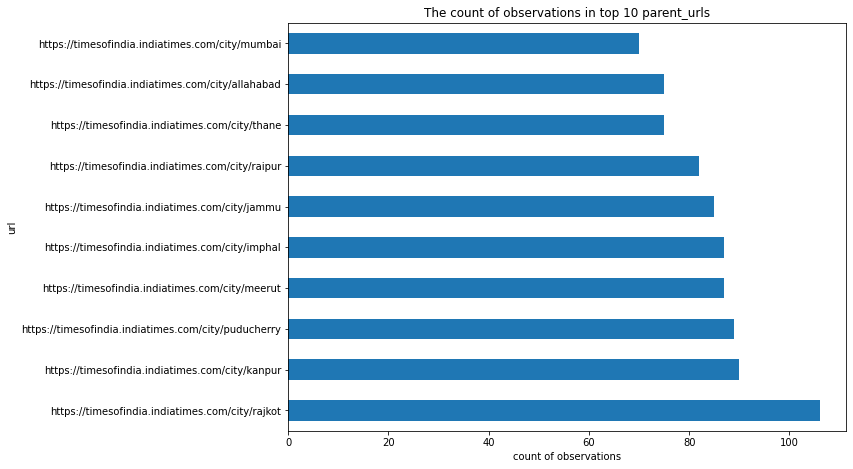

In [134]:
# the graphical representation of the count of observations in each parents_urls using bars.
df['parent_urls'].value_counts()[:10].plot.barh(subplots=True)
plt.title('The count of observations in top 10 parent_urls')
plt.xlabel('count of observations')
plt.ylabel('url')
plt.show()

> Well! we have pretty distinct parent urls. Hence, it would be good if we have them in the database.

<h3> sub_url

In [135]:
df['sub_url'][:3]

0    https://timesofindia.indiatimes.com/business/i...
1    https://timesofindia.indiatimes.com/business/i...
2    https://timesofindia.indiatimes.com/business/i...
Name: sub_url, dtype: object

> We have a unique sub url for every article. Hence, it would be really good if we have source of every news article in the database.

<h3> downloaded_date

In [136]:
df['downloaded_date'].value_counts()

2020-04-17 21:19:11.518    795
2020-03-02 08:45:37.625    617
2020-03-13 11:44:39.451    590
2020-03-11 12:10:39.335    466
2020-04-05 00:45:10.157    336
2020-03-31 22:30:51.304    253
Name: downloaded_date, dtype: int64

> We have 6 downloaded dates in the dataset and it would be good if we keep them.

<h3> common_kwd

In [137]:
df['common_kwd'].value_counts()[:5]

['police']      311
['arrested']    261
['booked']      213
['jail']        135
['traffic']     120
Name: common_kwd, dtype: int64

In [138]:
# User defined function to build wordcloud
def word_cloud(articles):
    
    comment_words = ' '

    # iterate through the csv file 
    for x in df[articles]:  
        
        # typecaste each val to string 
        x = str(x) 
        
        # split the value 
        tokens = x.split() 
        
        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower()   

        for y in tokens: 
            comment_words = comment_words + y + ' '

    return comment_words

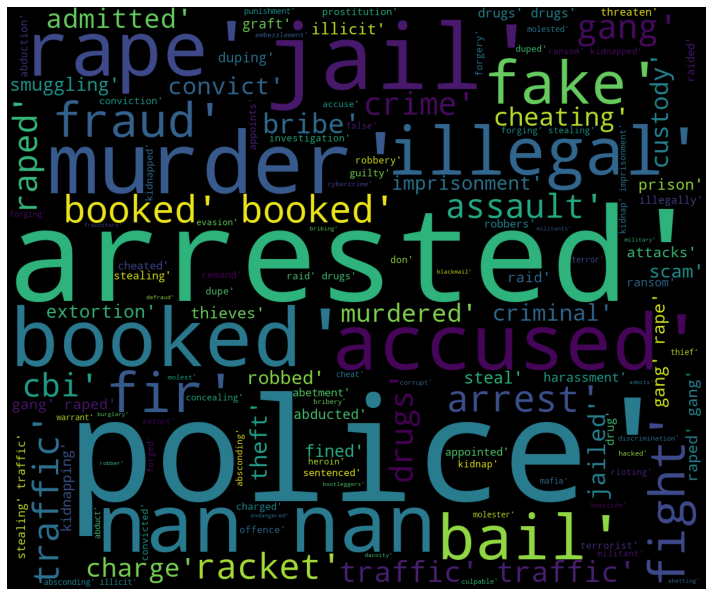

In [139]:
# Creating a wordcloud
wordcloud = WordCloud(width = 1200, height = 1000, background_color ='black', stopwords = set(STOPWORDS), 
                      min_font_size = 10).generate(word_cloud('common_kwd'))

# plot the WordCloud image  
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

> We can see 'police', 'arrested' and 'booked' are occuring most of the times in news articles. Well! these are the most common keyword for every article which we got while scraping news.

<h3> filter_url_status

In [140]:
df['filter_url_status'].unique()

array([ 1., nan])

> Since, we have only one boolean value in the filter_url_status. Hence, we will remove it in further steps.

<h3> author_name

In [141]:
df['author_name'].value_counts()[:10]

[]                           1420
['Tnn', 'Mar']                375
['Tnn', 'Updated', 'Mar']     336
['Tnn', 'Updated', 'Feb']     248
['Tnn', 'Updated', 'Apr']     178
['Tnn', 'Apr']                139
['Tnn', 'Feb']                 77
['Pti', 'Mar']                 48
['Tnn', 'Updated', 'Jan']      38
['Pti', 'Nov']                 31
Name: author_name, dtype: int64

> Since, we do not have any meaningful filter_url_status in the dataset. Hence, we will remove it in the further steps.

<h3> publish_date

In [142]:
df['publish_date'].value_counts()[:10]

None                         3116
2020-01-10 00:00:00             2
2019-12-02 00:00:00             2
2020-02-25 00:00:00             2
2020-04-12 12:37:12+00:00       1
2019-03-20 00:00:00             1
2019-12-03 00:00:00             1
2019-12-17 12:55:00+00:00       1
2019-12-07 00:00:00             1
2020-04-16 20:48:26+05:30       1
Name: publish_date, dtype: int64

<h3> body

In [143]:
df['body'].head()

0    (File photo)\n\nDownload The Times of India Ne...
1    Download The Times of India News App for Lates...
2    Over a decade since the launch of Bitcoin, the...
3    US President Donald Trump\n\nDownload The Time...
4    A Cathay Pacific Boeing 777 plane lands at Hon...
Name: body, dtype: object

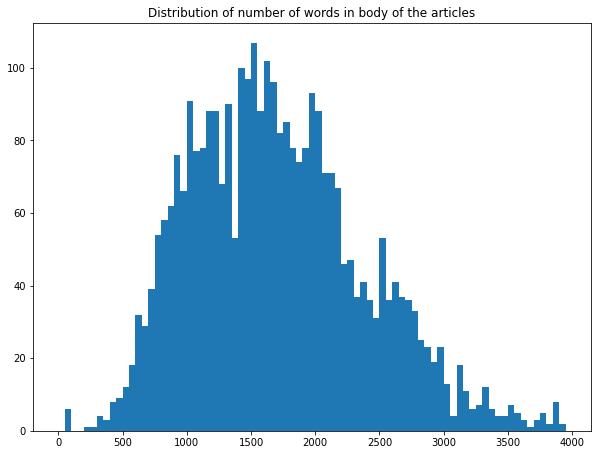

In [144]:
# Distribution of number of words in body of the articles
article = df.body.str.len()
article.hist(bins = np.arange(0,4000,50), grid=False)
plt.title('Distribution of number of words in body of the articles')
plt.show()

> We can see from the above histogram that most of the articles are in between 750 to 2250 words.

In [145]:
# Try to change the index to 1, 2, 3, 4, 5, 6, 7, 8.......
df['body'][0]

'(File photo)\n\nDownload The Times of India News App for Latest Business News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\nMUMBAI: Through a series of circulars on Monday, Sebi relaxed several compliance provisions for market participants by up to three months due to the unusual situation that has emerged because of the coronavirus pandemic.Among the slew of decisions, the markets regulator allowed credit rating agencies (CRAs) to not qualify a Covid-19 related non-payment of interest and principal as default, and allowed foreign funds to send in scanned copies of documents for renewal of registration. It also extended the deadline for regulatory filing for alternate investment and venture capital funds till April 30 and also extended the second phase of UPI implementation for retail investors till further notice.In its circular on the ratings decision, Sebi said that in view of the three-month moratorium/deferment on payment permitted by the RBI,

> Body is the variable on which we will be performing text mining i.e., deriving the most frequent keywords, deriving the crime category and names of criminals etc. <br>
> But When I'd gone through each line of body I could see that there are so many messy extra lines like this "Representative imageDownload.........!\nOrder Now", "Download The Times of.........India Newspaper! Order Now\n\n']" and so on. <br>
> Which is just a noise. So, I will remove these lines from every body and then the body would be perfect.

<h3> image_link

In [146]:
df['image_link'][:3]

0    https://static.toiimg.com/thumb/msid-74909016,...
1    https://static.toiimg.com/thumb/msid-47529300,...
2    https://static.toiimg.com/thumb/msid-74725342,...
Name: image_link, dtype: object

> Image link is important as at the end of this project we will download all the images in our database using image link only.

<h3> keywords

In [147]:
df['keywords'][:3]

0    ['allowed', 'rules', 'till', 'default', 'view'...
1    ['study', 'donate', 'drug', 'covid19', 'hydrox...
2    ['exchange', 'services', 'security', 'institut...
Name: keywords, dtype: object

> Well! these are the some keywords present in the particular article which might be quite relevent to the article.

<h3> summary

In [148]:
df['summary'].head()

0    (File photo)Download The Times of India News A...
1    Download The Times of India News App for Lates...
2    Over a decade since the launch of Bitcoin, the...
3    US President Donald TrumpDownload The Times of...
4    A Cathay Pacific Boeing 777 plane lands at Hon...
Name: summary, dtype: object

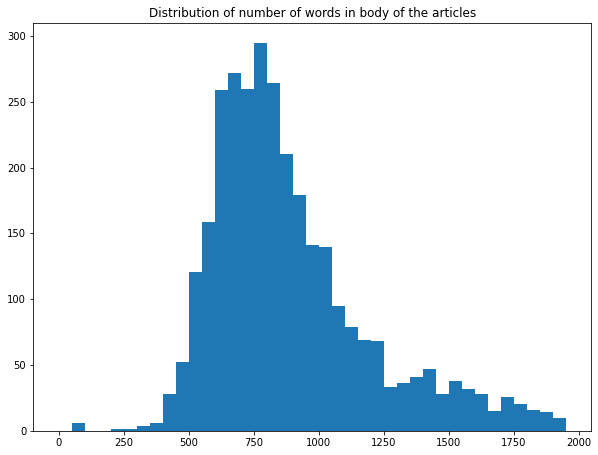

In [149]:
# Distribution of number of words in summary of the articles
article = df.summary.str.len()
article.hist(bins = np.arange(0,2000,50), grid=False)
plt.title('Distribution of number of words in body of the articles')
plt.show()

> We can see from the above histogram that most of the summaries have words between 500 to 1000.

In [150]:
# Try to change the index to 1, 2, 3, 4, 5, 6, 7, 8.......
df['summary'][0]

'(File photo)Download The Times of India News App for Latest Business NewsSubscribe Start Your Daily Mornings with Times of India Newspaper!\nOrder NowMUMBAI: Through a series of circulars on Monday, Sebi relaxed several compliance provisions for market participants by up to three months due to the unusual situation that has emerged because of the coronavirus pandemic.Among the slew of decisions, the markets regulator allowed credit rating agencies (CRAs) to not qualify a Covid-19 related non-payment of interest and principal as default, and allowed foreign funds to send in scanned copies of documents for renewal of registration.\nAccordingly, based on its assessment, if the CRA is of the view that the delay in payment of interest/principal has arisen solely due to the lockdown conditions…CRAs may not consider the same as a default event and/or recognise default.”This has been done to align Sebi’s guidelines along with the relaxations given by the RBI, market players said.\nFor foreign

> Summary would be really important for the database. Hence, we will keep it. <br> But When I'd gone through each summary I could see that there are few extra messy lines like this "Representative imageDownload.........!\nOrder Now" and "Download The Times of.........India Newspaper! Order Now\n\n']" and so on. Which is just a noise. So, I will remove these line from every summary and then the summary would be perfect.

___

<center> <h1> TEXT PREPROCESSING

___

- <H4> DATA SELECTION AND CONSTRUCTION

In [151]:
# Dropping irrelevent varibales from the dataset. Since, these won't play any role in text mining and creating db
df = df.drop(columns=['common_kwd', 'keywords', 'filter_url_status', 'author_name'])

In [152]:
df.head()

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary
0,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,None,(File photo)\n\nDownload The Times of India Ne...,"https://static.toiimg.com/thumb/msid-74909016,...",(File photo)Download The Times of India News A...
1,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,None,Download The Times of India News App for Lates...,"https://static.toiimg.com/thumb/msid-47529300,...",Download The Times of India News App for Lates...
2,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31 22:30:51.304,None,"Over a decade since the launch of Bitcoin, the...","https://static.toiimg.com/thumb/msid-74725342,...","Over a decade since the launch of Bitcoin, the..."
3,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-11 12:10:39.335,None,US President Donald Trump\n\nDownload The Time...,"https://static.toiimg.com/thumb/msid-74556995,...",US President Donald TrumpDownload The Times of...
4,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-11 12:10:39.335,None,A Cathay Pacific Boeing 777 plane lands at Hon...,"https://static.toiimg.com/thumb/msid-74488017,...",A Cathay Pacific Boeing 777 plane lands at Hon...


- <h4> DATE CONVERSION

In [153]:
# Because NaTType does not support strftime, hence filling missing date values with mode
df['downloaded_date'] = df['downloaded_date'].fillna(df['downloaded_date'].mode()[0])

# Converting date to the right format
df['downloaded_date'] = df['downloaded_date'].apply(lambda x: x.strftime('%d%b%Y'))

# Converting string date to datetime format
df['downloaded_date'] = pd.to_datetime(df['downloaded_date'])

In [154]:
# Because NaTType does not support strftime, hence filling missing date values with '2020-05-01'
df['publish_date'] = df['publish_date'].replace("None", '2020-05-01')

# Converting string date to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

# Converting date to the right format
df['publish_date'] = df['publish_date'].apply(lambda x: x.strftime('%d%b%Y'))

In [155]:
df[['downloaded_date', 'publish_date']].head()

,downloaded_date,publish_date
0,2020-03-31,01May2020
1,2020-03-31,01May2020
2,2020-03-31,01May2020
3,2020-03-11,01May2020
4,2020-03-11,01May2020


- <h4> DATA CLEANING

In [156]:
# Dropping duplicate rows from the dataset
df = df.drop_duplicates(subset='body', keep='first').reset_index(drop='first')

In [157]:
# New shape after removal of duplicates
df.shape

(2351, 7)

- <h4> REMOVAL OF MESSY LINES FROM THE BODY AND SUMMARY

While going through the body and summary of articles, I found some messy and irrelevent lines in the beginning of the articles. Hence, I made a list of all those lines and put them into a list and initialised a loop that will remove all such lines from the articles. In future if you find any such irrelevent or messy lines in the articles, you can add that to the list and the function will remove them.

In [158]:
# Manually extracted messy lines from body and summary
messy_line = ['(File photo)\n\nDownload The Times of India News App for Latest Business News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Download The Times of India News App for Latest Business News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Representative image.\n\nDownload The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Download The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              '(File photo)Download The Times of India News App for Latest Business NewsSubscribe Start Your Daily Mornings with Times of India Newspaper!\nOrder Now',
              'Download The Times of India News App for Latest Business NewsSubscribe Start Your Daily Mornings with Times of India Newspaper!\nOrder Now',
              'Download The Times of India News App for Latest City NewsSubscribe Start Your Daily Mornings with Times of India Newspaper!\n',
              'Download The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Representative image\n\nDownload The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Download The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Download The Times of India News App for Latest City News\n\nSubscribe Start Your Daily Mornings with Times of India Newspaper! Order Now\n\n',
              'Picture used for representational purpose only\n\n','File photo used for representational purpose\n\n',
              'Picture for representational purpose only.\n\n','Photo used for representational purpose only\n\n','Order Now',
              'Photo used for representational purpose only','Representative Image','Representative image\n\n',
              'Representative Image\n\n','Representational Image','Representative image',':','\n','\\']

# remove messy line
for mess in messy_line:
    df['body'] = df['body'].apply(lambda x: x.replace(mess, ''))
    df['summary'] = df['summary'].apply(lambda x: x.replace(mess, ''))

- <h4> REMOVAL OF STATE NAMES IN CAPITAL FROM BODY AND SUMMARY

We can see that in body and summary the first word of the article is a location in capital, so while fetching out the organisation name from the body, the spacy library would consider it as an organisation. Hence, we would be removing all state names in capital.
For that I have collected a list of 214 cities and states from India in an excel file. Hence, I would be using that file and convert it into a list and will run a loop that will remove names present in states excel file from the articles.

In [159]:
# Loading states df and converting it to list
states = pd.read_excel('input/states.xlsx')['city'].to_list()

# remove state names in capital
for state in states:       
    df['body'] = df['body'].apply(lambda x: x.replace(state, ''))
    df['summary'] = df['summary'].apply(lambda x: x.replace(state, ''))

- <h4> FURTHER DATA CLEANING

In [160]:
# Dropping duplicate rows from the dataset
df = df.drop_duplicates(subset='body', keep='first').reset_index(drop='first')

# New shape after removal of duplicates
df.shape

(2034, 7)

- <h4> DELETION OF IRRELEVENT ARTICLES (CORONA VIRUS NEWS)

Since, this is the time of Corona Virus Pandemic. So there are lots of articles related to Coronavirus, Covid-19, Quarantine and Lockdown. Hence, I will target these 4 words and will be removing all such articles from the dataset.

In [161]:
count = 0

# Running a loop to count irrelevent articles
for index in range(len(df)):
    if 'covid' in df['body'][index].lower():
        df = df.drop(index, axis=0)
        count += 1
    elif 'corona' in df['body'][index].lower():
        df = df.drop(index, axis=0)
        count += 1
    elif 'lockdown' in df['body'][index].lower():
        df = df.drop(index, axis=0)
        count += 1
    elif 'quarantine' in df['body'][index].lower():
        df = df.drop(index, axis=0)
        count += 1

df = df.reset_index(drop='first')

# Count of irrelevent articles
print('Number of articles deleted: ', count)
print('New shape after removal of irrelevent articles:', df.shape)

Number of articles deleted:  732
New shape after removal of irrelevent articles: (1302, 7)


___

<center><h2> TEXT CLEANING

___

Let's extract some keywords from the articles.

In [162]:
# import stopwords
from nltk.corpus import stopwords 

# Cleaning 'body' column to find the right keywords for text mining
def clean_text(text):
    
    # Remove numbers 
    remove_num = re.sub(r'\d+', '', text)
    
    # Text lowercase
    text_lower = remove_num.lower()
    
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    translator = str.maketrans('', '', '”“’``!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
    remove_punc = text_lower.translate(translator)
    
    # Remove whitespace
    remove_wspace = " ".join(remove_punc.split())
    
    # Remove stopwords
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(remove_wspace) 
    remove_sw = [word for word in word_tokens if word not in stop_words]
    
    # Lemmatize string
    lemmas = [WordNetLemmatizer().lemmatize(word, pos ='v') for word in remove_sw]
    
    return lemmas

- <h4> EXTRACTING KEYWORDS FROM THE ARTICLES

In [163]:
# Calling function to clean the body text
df['article_keywords'] = df['body'].apply(lambda x: clean_text(x))

In [164]:
# Joining article keywords
df['clean_article'] = df['article_keywords'].apply(lambda x: ' '.join(x))

- <h4> WORDCLOUD OF KEYWORDS EXTRACTED FROM BODY

Let's visualize how the keywords extracted from the body looks like and what are some of the most used words in the criminal database articles. It will help us in getting familiar with the data.

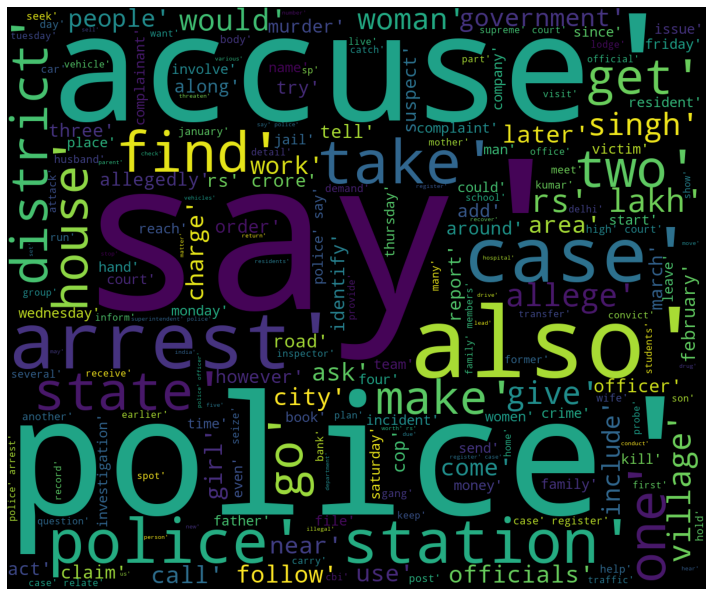

In [165]:
# Creating a wordcloud
wordcloud = WordCloud(width = 1200, height = 1000, background_color ='black', stopwords = set(STOPWORDS), 
                      min_font_size = 10).generate(word_cloud('article_keywords'))

# plot the WordCloud image  
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

As we can see in the above graph, these are some of the most occuring keywords in the news articles.

___

<center><h2> EXTRACTING INFORMATION FROM THE ARTICLES

___

- <h4> HOW SPACY WORKS?

Well! to extract criminal organisations, location of crime, law and names of criminals. We will be using spacy library. Please install spacy library first and its large dictionary as mentioned in the import library section above. For now, Let's see how spacy works?

<h1><center>NER - Named Entitiy Recognition Exercise

In [166]:
# Try to change the index(0, 1, 2, 3, 5, 6, 10....) to see how it works and identify entities
doc = nlp(df['body'][17])

# This is how spacy visualise
displacy.render(doc, style='ent', jupyter=True)

- <h4> VISUALIZING SPECIFIC ENTRIES

In [167]:
displacy.render(doc, style='ent', jupyter=True, options={'ents': ['ORG', 'NORP', 'PERSON', 'GPE', 'LAW']})

- <h4> EXTRACTING ORGANISATIONS, LOCATIONS, LAWS AND FULL NAMES RELATED TO CRIME

Well! Here we extract the most important information from the articles i.e., Criminal Organisations, Location involved with Crime, Law and Criminals involved with crime. We will be doing further analysis on these entities.

In [168]:
# function to extract organisation, location, law and full names from the article
def extract_info(article, label):
    return [(ent.text) for ent in nlp(article).ents if ent.label_ in label]

In [169]:
%%time

df['organisation'] = df['body'].apply(lambda x: extract_info(x, ('ORG', 'NORP')))
df['location'] = df['body'].apply(lambda x: extract_info(x, ('GPE')))
df['law'] = df['body'].apply(lambda x: extract_info(x, ('LAW')))
df['full_name'] = df['body'].apply(lambda x: extract_info(x, ('PERSON')))

CPU times: user 4min 27s, sys: 20.5 s, total: 4min 47s
Wall time: 4min 56s


- <h4> REMOVING DUPLICATES

If we try to change the index in full names, organisations, laws and locations, we can see that there are some duplicates entries present in the dataset. Hence, we will remove all the duplicate elements from the lists. 

In [170]:
# You can try changing the index
df['full_name'][2]

['Dilip Chakma',
 'Santana Chakma',
 'Narottam Chakma',
 'Sanjib Chakma',
 'Bhanupada Chakraborty',
 'Santana Chakma',
 'Nabendu Bhattacharjee',
 'Dilip Chakma',
 'NDPS Act',
 'Subal Bhowmik',
 'Biplab Deb',
 'Deb']

In [171]:
# Creating a UDF to remove duplicate elements 
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 

In [172]:
# Running a loop to remove duplicates in organisations, locations, laws and full names
for col in ['organisation', 'location', 'law', 'full_name']:
    
    # Converting lists into lowercase before removing duplicates
    df[col] = df[col].apply(lambda x: [element.lower() for element in x])
    
    # Replacing apostrophe 's 
    df[col] = df[col].apply(lambda x: [element.replace(r"'s", "") for element in x])
    
    # remove duplicates in organisations, locations, laws and full names
    df[col] = df[col].apply(lambda x: Remove(x))
    
    # converts the first character of a string to capital (uppercase) letter
    df[col] = df[col].apply(lambda x: [element.title() for element in x])

In [173]:
# Replace unneccesory brackets 
df['full_name'] = df['full_name'].apply(lambda x: [element.replace(r")", "") for element in x])

- <h4> REMOVING IRRELEVENT LOCATIONS

While extracting locations from the articles, Spacy library fetched some irrelent locations as well. So, I have created a list of such of those locations and put them into a loop to remove them. If you find more irrelevent locations you can also add them to the list so that we can do further analysis in a better way.

In [174]:
# Creating a UDF to remove duplicate elements 
def Remove_loc(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in ['India','SC','KR','duties.“I','CM','District','PA','MD','Uttar Pradesh "s']: 
            final_list.append(num) 
    return final_list 

In [175]:
# Running a loop to remove messy locations from the location
df['location'] = df['location'].apply(lambda x: Remove_loc(x))

- <h4> TOP 10 AREAS WITH MAXIMUM NUMBER OF CRIME RATES

This is visualion of top 10 cities with maximum number of crime rates that means these are the places that were mentioned the most in the articles. Have a look!

In [176]:
# User defined function for bar graph
def bar_plot(articles):
    
    # Creating the Bag of Words model 
    word2count = {}

    for data in df[articles]: 
        for word in data:  
            if word not in word2count.keys(): 
                word2count[word] = 1   
            else: 
                word2count[word] += 1
                
    # converting word2count dictionary to DataFrame
    word2count_df = pd.DataFrame(word2count.items(), columns = [articles, 'frequency'])
    freq_words = word2count_df.sort_values('frequency', ascending = False).reset_index(drop = True)
                
    return freq_words

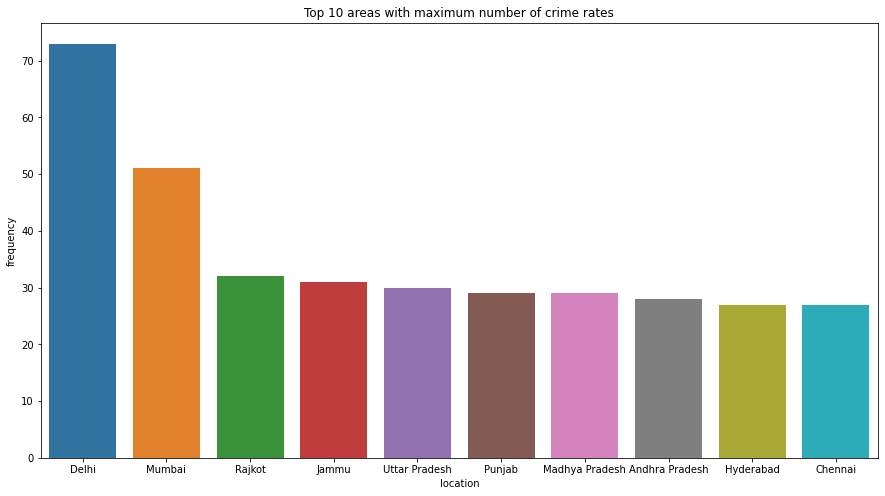

In [177]:
# Setting figure size
plt.figure(figsize = (15, 8), facecolor = None)

freq_words = bar_plot('location')

# Plotting
sns.barplot(y = 'frequency', x = 'location', data = freq_words.head(10))
plt.title('Top 10 areas with maximum number of crime rates')
plt.show()

> Delhi, Mumbai are the cities that were mentioned the most in crime news or related articles.

- <h4> TOP 10 LAW VOILATION

These are the top 10 laws that were mentioned the most in the articles. We have extracted them through spacy library with LAW entity keyword.

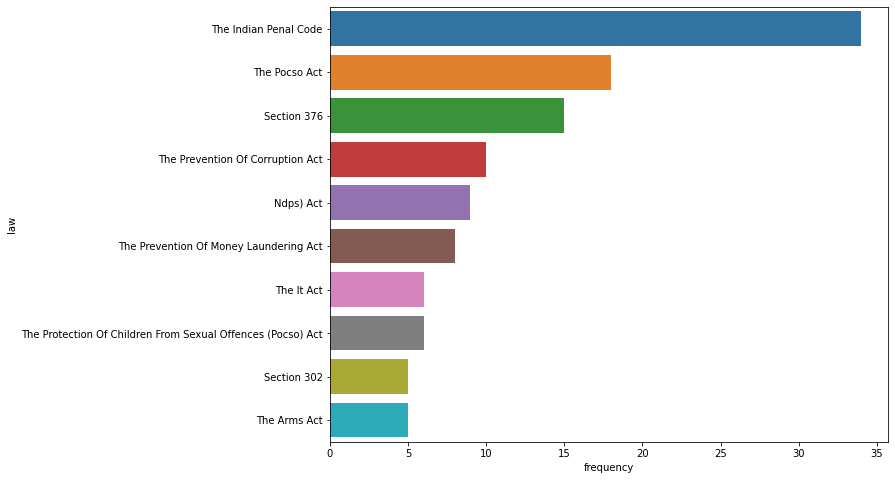

In [178]:
# Setting figure size
plt.figure(figsize = (10, 8), facecolor = None)

freq_words = bar_plot('law')

# Plotting
sns.barplot(x = 'frequency', y = 'law', data = freq_words.head(10))
plt.show()

- <h4> EXTRACTING FIRST NAMES AND LAST NAMES FROM FULL NAME

Here we split full name into first name and last name. If a string is of length 1 then it will remain in the first name and if the string is the length of 2 or more then the first word will go in the first name and the remaining will go in last name.

In [179]:
# function to extract first name
def first_name(fullname):
    return [name.split(" ", 1)[0] for name in fullname]

# finction to extract last name
def last_name(fullname):
    return [name.split(" ", 1)[1] for name in fullname if len(name.split(" ", 1)) >=2]        

In [180]:
# Calling their respective function 
df['first_name'] = df['full_name'].apply(lambda x: first_name(x))
df['last_name'] = df['full_name'].apply(lambda x: last_name(x))

- <h4> EXTRACTING AGE OF CRIMINALS

Here we extract age of criminals in four ways. This code will fetch, if the age is mentioned in brackets like (19), 19 years old, 19-years-old, aged 19 and age 19.

In [181]:
# function to extract age of criminals
def find_age(article):
    return re.findall(r'\s\W(\d{2})\W\s', article) or re.findall(r'(\d{2})\W\D+ear\W\D+ld', article) or re.findall(r'.aged\s(\d{2})', article) or re.findall(r'.age\s(\d{2})', article)

In [182]:
# Calling function to extrat age of criminals
df['age'] = df['body'].apply(lambda x: find_age(x))

- <h4> TOP 15 AGE OF CRIMINALS

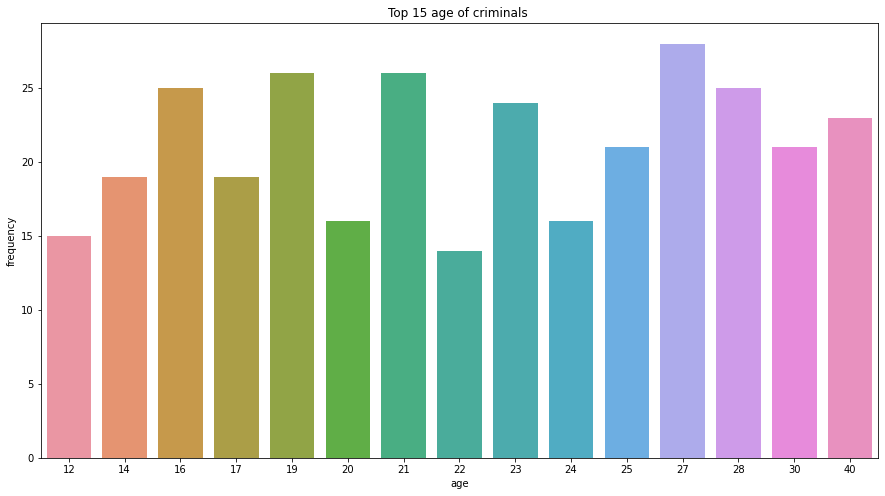

In [183]:
# Setting figure size
plt.figure(figsize = (15, 8), facecolor = None)

freq_words = bar_plot('age')

# Plotting
sns.barplot(y = 'frequency', x = 'age', data = freq_words.head(15))
plt.title('Top 15 age of criminals ')
plt.show()

> We can see from the above graph that, Most of the criminals are in the age between 20 to 30.

- <h4> EXTRACTING CRIMINALS's AGE_AS_OF

In [184]:
# Converting string date to datetime format
df['publish_date'] = pd.to_datetime(df['publish_date'])

# extracting month and year from the publish date
df['age_as_of'] = df['publish_date'].apply(lambda x: x.strftime('%b%Y'))

In [185]:
df[:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,location,law,full_name,first_name,last_name,age,age_as_of
0,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-31,2020-05-01,"Over a decade since the launch of Bitcoin, the...","https://static.toiimg.com/thumb/msid-74725342,...","Over a decade since the launch of Bitcoin, the...","[decade, since, launch, bitcoin, worlds, first...",decade since launch bitcoin worlds first crypt...,"[Bitcoin, Platformswhile, Japanese, Fidelity I...",[Bakkt],[],"[Mt. Gox, Kraken, Gox, Coinbase, Compound, All...","[Mt., Kraken, Gox, Coinbase, Compound, Alluva]",[Gox],[17],May2020
1,https://timesofindia.indiatimes.com/business/i...,https://timesofindia.indiatimes.com/business/i...,2020-03-11,2020-05-01,A Cathay Pacific Boeing 777 plane lands at Hon...,"https://static.toiimg.com/thumb/msid-74488017,...",A Cathay Pacific Boeing 777 plane lands at Hon...,"[cathay, pacific, boeing, plane, land, hong, k...",cathay pacific boeing plane land hong kong air...,"[Cathay Pacific Boeing, Cathay Pacific, The In...","[Hong Kong, Hong Kong Hong Kong, Britain, Uk]",[],[Steve Eckersley],[Steve],[Eckersley],[],May2020
2,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,The personal security guard of a Tripura mini...,"https://static.toiimg.com/thumb/msid-74412447,...","BJP spokesperson Nabendu Bhattacharjee said, ""...","[personal, security, guard, tripura, minister,...",personal security guard tripura minister two p...,"[Tripura, Kanchanpur, Mizoram, Tripura State R...",[Yaba],[Ndps) Act],"[Dilip Chakma, Santana Chakma, Narottam Chakma...","[Dilip, Santana, Narottam, Sanjib, Bhanupada, ...","[Chakma, Chakma, Chakma, Chakma, Chakraborty, ...",[],May2020


- <h4> EXTRACTING SUB CATEGORIES

I have manually collected a list of 358 crimes from Wikipedia: https://en.wikipedia.org/wiki/Category:Crimes

Hence I will be targeting these crime sub categories in the body of each article and if the crime sub category matches, it will be assigned to that article. In the same way, an article can belong to multiple sub categories. You can also add new crimes to expand the list.

In [186]:
# function to assign sub categories
def sub_cat(article):
    return Remove([crime for crime in crime_list if crime in article.lower()] or ['others' for crime in crime_list if crime not in article.lower()])

In [187]:
# Importing crime list and converting it into a list
crime_list = pd.read_csv('input/crime_list.csv')['crime_type'].to_list()

# Calling function to extract sub categories
df['sub_category'] = df['body'].apply(lambda x: sub_cat(x))

- <h4> VISUALIZING SUB CATEGORIES

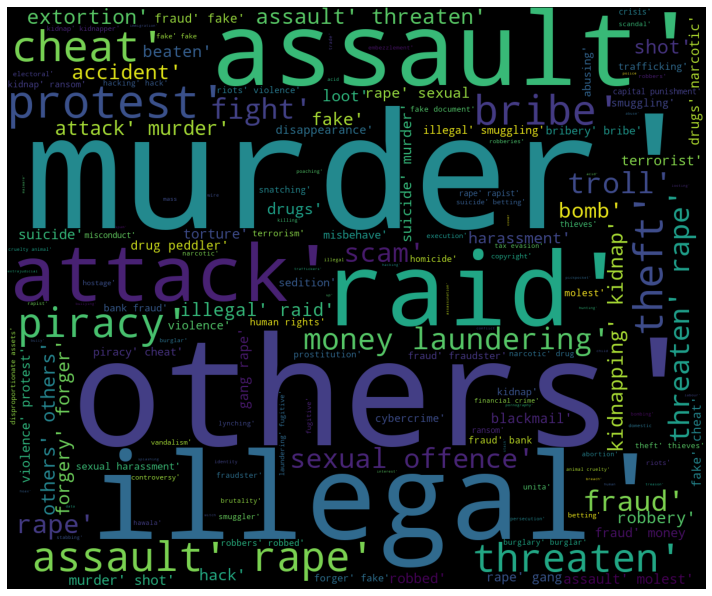

In [188]:
# Creating a wordcloud
wordcloud = WordCloud(width = 1200, height = 1000, background_color ='black', 
                      stopwords = set(STOPWORDS)).generate(word_cloud('sub_category'))

# plot the WordCloud image  
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()

> As we can see from the above wordcloud; Murder, Illegal, Assault, Raid, Attack and others are the most occuring crime sub categories in the articles.

- <h4> EXTRACTING CRIME CATEGORIES

We have assigned sub categories to the articles, now it's time to assign categories. I have categorised the sub-categories into categories. You are free to change according to you that which category should be assigned to which sub-category. Moreover, you can add new sub-categories and categories too.

In [189]:
# function to assign categories
def category(sub_cat):
    return Remove(['Attacks' for crime in sub_cat 
                    if crime in crime_cat['Attacks'].to_list()] or ['Commercial_crimes' for crime in sub_cat 
                    if crime in crime_cat['Commercial_crimes'].to_list()] or ['Corruption' for crime in sub_cat 
                    if crime in crime_cat['Corruption'].to_list()] or ['Cruelty_to_animals' for crime in sub_cat 
                    if crime in crime_cat['Cruelty_to_animals'].to_list()] or ['Cybercrime' for crime in sub_cat 
                    if crime in crime_cat['Cybercrime'].to_list()] or ['Domestic_violence' for crime in sub_cat
                    if crime in crime_cat['Domestic_violence'].to_list()] or ['Extortion' for crime in sub_cat 
                    if crime in crime_cat['Extortion'].to_list()] or ['Forgery' for crime in sub_cat 
                    if crime in crime_cat['Forgery'].to_list()] or ['Fraud' for crime in sub_cat 
                    if crime in crime_cat['Fraud'].to_list()] or ['Harassment' for crime in sub_cat 
                    if crime in crime_cat['Harassment'].to_list()] or ['Human_rights' for crime in sub_cat 
                    if crime in crime_cat['Human_rights'].to_list()] or ['Kidnapping' for crime in sub_cat 
                    if crime in crime_cat['Kidnapping'].to_list()] or ['Mutilation' for crime in sub_cat 
                    if crime in crime_cat['Mutilation'].to_list()] or ['Rape' for crime in sub_cat 
                    if crime in crime_cat['Rape'].to_list()] or ['Crimes_in_religion' for crime in sub_cat 
                    if crime in crime_cat['Crimes_in_religion'].to_list()] or ['Smuggling' for crime in sub_cat 
                    if crime in crime_cat['Smuggling'].to_list()] or ['Theft' for crime in sub_cat 
                    if crime in crime_cat['Theft'].to_list()] or ['Torture' for crime in sub_cat 
                    if crime in crime_cat['Torture'].to_list()] or ['Terrorism' for crime in sub_cat 
                    if crime in crime_cat['Terrorism'].to_list()] or ['Miscelleneous' for crime in sub_cat 
                    if crime in crime_cat['Miscelleneous'].to_list()] or ['Others' for crime in sub_cat 
                    if crime in crime_cat['Others'].to_list()]) 

In [190]:
# Importing crime categories
crime_cat = pd.read_csv('input/crime_category.csv')

# Calling function to extract categories 
df['category'] = df['sub_category'].apply(lambda x: category(x))

- <h4> VISUALIZING CATEGORIES

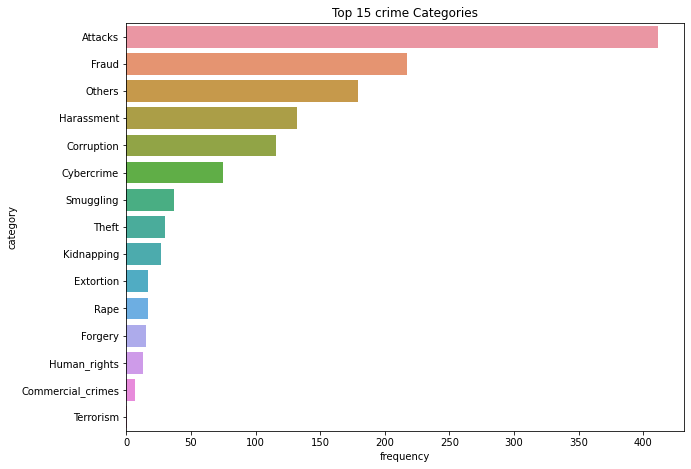

In [191]:
# Plotting
sns.barplot(x = 'frequency', y = 'category', data = bar_plot('category'))
plt.title('Top 15 crime Categories')
plt.show()

> From the above graph it seems like that most of the crimes are related to Attacks, Fraud, Harrasment and Corruption.

- <h3> SENTIMENT ANALYSIS

Now, it's time for some sentiment analysis. I'll be extracting the sentiments from the body of the article. Hence, Negative intensity tells us that how much negative the article is within a range of 0 to 1 where 0 means lowest negativity and 1 means highest negativity. 

In this way, we can get know that how much bigger the crime and criminal is.

In [192]:
# Creating an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Returns a dictionary of scores in negative, positive, neutral and compound
df['polarity_scores'] = df['body'].apply(lambda intensity: sid.polarity_scores(intensity))

# Exctracting negative scores
df['risk_score'] = df['polarity_scores'].apply(lambda score_dict: score_dict['neg'])

In [193]:
# Sorting df by risk_score
df = df.sort_values('risk_score', ascending=False).reset_index(drop='first')

In [194]:
df[:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,law,full_name,first_name,last_name,age,age_as_of,sub_category,category,polarity_scores,risk_score
0,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-04-17,2020-05-01,"This story is from January 13, 2020Manipur Sti...","https://static.toiimg.com/thumb/msid-47529300,...","This story is from January 13, 2020Manipur Sti...","[story, january, manipur, stir, threat, l, sot...",story january manipur stir threat l sotinkumar...,[],...,[],[L Sotinkumar],[L],[Sotinkumar],[],May2020,[others],[Others],"{'neg': 0.367, 'neu': 0.633, 'pos': 0.0, 'comp...",0.367
1,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,"In a barbaric incident, a 6-year-old girl was...","https://static.toiimg.com/thumb/msid-74241246,...","In a barbaric incident, a 6-year-old girl was...","[barbaric, incident, yearold, girl, murder, ra...",barbaric incident yearold girl murder rap year...,[Kachakla Tripura],...,[],[],[],[],[30],May2020,"[murder, kidnap, rape]",[Attacks],"{'neg': 0.348, 'neu': 0.615, 'pos': 0.037, 'co...",0.348
2,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-03-31,2020-05-01,"District police, Samba claimed to have solved...","https://static.toiimg.com/thumb/msid-74207015,...","District police, Samba claimed to have solved...","[district, police, samba, claim, solve, blind,...",district police samba claim solve blind murder...,"[Samba, Patyari Katlan Tehsil]",...,[],[Aatama Ram],[Aatama],[Ram],[],May2020,"[murder, blackmail]",[Attacks],"{'neg': 0.345, 'neu': 0.631, 'pos': 0.024, 'co...",0.345


- <h4> EXTRACTING ENTERPRISES, GANGS, AND SYNDICATES

I have manually extracted the list of 119 criminal enterprises, gangs and syndicates from here: https://en.wikipedia.org/wiki/List_of_criminal_enterprises,_gangs,_and_syndicates

I have targeted these criminal enterprises, gangs and syndicates in the articles and if any of them present in the article then it will be assigned in criminal_organisation column. You can add more organisations from NIA Official website with their status and then we will be able to identify more Criminal Enterprises, Gangs and Syndicates.

In [195]:
# function to extract criminal organisation
def criminal_org(article):
    return Remove([gang for gang in criminal_organisation if gang in article.lower()])

In [196]:
# Importing criminal organisations and converting them to list
criminal_organisation = pd.read_csv('input/criminal_organisation.csv')['criminal_org'].to_list()

# Calling function to extract criminal gangs
df['criminal_organisation'] = df['body'].apply(lambda x: criminal_org(x))

In [197]:
# count of all Criminal organisations present in the dataset
df['criminal_organisation'].astype(str).value_counts().reset_index()

,index,criminal_organisation
0,[],1291
1,['d company'],6
2,['kangleipak communist party'],1
3,['communist party of india'],1
4,['indian mujahideen'],1
5,['jaish-e-mohammed'],1
6,['al-qaeda'],1


- <h4> EXTRACTING MOST WANTED CRIMINALS

Well! I have manually extracted a list of 98 NIA Most Wanted criminals with their aliases, and rewards and status from Wikipedia. Here is the link: https://en.wikipedia.org/wiki/NIA_Most_Wanted

Hence, I'll be looking for these names in the articles and assigning them to a most_wanted column. You can add more names from NIA Official website with their alias, and status and then we will be able to identify more Most Wanted Criminals.

In [198]:
# function to extract most wanted criminals by NIA
def most_wanted(article):
    return Remove([criminal for criminal in NIA_most_wanted['Name'].to_list() if criminal in article])

In [199]:
# Importing political parties
NIA_most_wanted = pd.read_excel('input/NIA_most_wanted.xlsx')

# Calling function to extract criminal gangs
df['most_wanted'] = df['body'].apply(lambda x: most_wanted(x))

In [200]:
# count of all Criminal organisations present in the dataset
df['most_wanted'].astype(str).value_counts().reset_index()

,index,most_wanted
0,[],1292
1,['Rafiq'],3
2,['Zakir'],3
3,['Abdul Sattar'],2
4,['Anwar Hussain'],1
5,['Kausar'],1


- <h4> ASSIGNING ALIASES TO MOST WANTED CRIMINALS

In [201]:
# function to assign aliases to most wanted criminals
def aliases(wanted_criminal):
    return [NIA_most_wanted['Alias'][i] for i in range(len(NIA_most_wanted['Name'])) 
            if NIA_most_wanted['Name'][i] in wanted_criminal]

In [202]:
# calling function to assign aliases to most wanted criminals
df['alias'] = df['most_wanted'].apply(lambda x: aliases(x))

- <h4> ASSIGNING STATUS TO MOST WANTED CRIMINALS

In [203]:
# function to assign aliases to most wanted criminals
def aliases(wanted_criminal):
    return [NIA_most_wanted['Reward'][i] for i in range(len(NIA_most_wanted['Name']))
            if NIA_most_wanted['Name'][i] in wanted_criminal]

In [204]:
# calling function to assign aliases to most wanted criminals
df['status'] = df['most_wanted'].apply(lambda x: aliases(x))

- <h4> EXTRACTING POLITICAL LINKS

In the same way I have manually made a list of more than 100 political parties working in India from here: https://en.wikipedia.org/wiki/List_of_political_parties_in_India

I'll be targeting these parties in the body of articles and if the political party matches then the party will be assigned in political_links column.

In [205]:
# function to extract political links
def political_links(article):
    return Remove([party for party in political_parties if party in article])

In [206]:
# Importing political parties and converting them to list
political_parties = pd.read_csv('input/political_parties.csv')['pol_parties'].to_list()

# Calling function to extract criminal gangs
df['political_links'] = df['body'].apply(lambda x: political_links(x))

- <h4> VISUALIZING POLITICAL LINKS

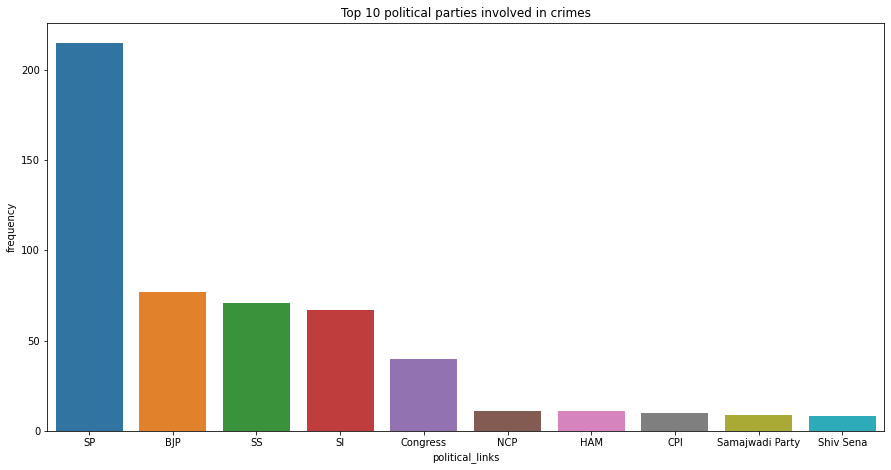

In [207]:
# Setting figure size
plt.figure(figsize = (15, 7.5), facecolor = None)

freq_words = bar_plot('political_links')

# Plotting
sns.barplot(y = 'frequency', x = 'political_links', data = freq_words.head(10))
plt.title('Top 10 political parties involved in crimes')
plt.show()

> SP, BJP, SS, SI and Congess are the political parties that were mentioned the most in Crime News articles.

- <h4> EXTRACTING POLITICIAN's NAMES FROM THE ARTICLES

In [211]:
# function to extract politician names from the articles
def pol_parties(article):
    return Remove([name for name in pi['Name'].to_list() if name in article])

In [212]:
# Importing political parties
pi = pd.read_excel('input/PIparty.xlsx')

# Calling function to extract plitical names
df['pi_name'] = df['body'].apply(lambda x: pol_parties(x))

In [213]:
# getting the length of lists in political_links column
df['len_political_links'] = df['political_links'].apply(lambda x: len(x))

# keeping only those names which has relation with political political parties i.e. political links
for index, element in enumerate(df['len_political_links']):
    if element == 0:
        df['pi_name'][index] = []
        
# deleting len_political_links from database because it won't play any futher role in database
df = df.drop(columns=['len_political_links'])

In [214]:
# function to assign aliases of the politicians
def pi_aliases(pol_party):
    return [pi['Alias'][i] for i in range(len(pi['Name'])) 
            if pi['Name'][i] in pol_party]

# function to assign date of birth of the politicians
def pi_dob(pol_party):
    return [pi['DOB'][i] for i in range(len(pi['Name'])) 
            if pi['Name'][i] in pol_party]

# function to assign locations of the politicians
def pi_loc(pol_party):
    return [pi['Location'][i] for i in range(len(pi['Name'])) 
            if pi['Name'][i] in pol_party]

# function to assign political party of the politicians
def pi_party(pol_party):
    return [pi['Party'][i] for i in range(len(pi['Name'])) 
            if pi['Name'][i] in pol_party]

In [215]:
%%time

# Calling every function
df['pi_alias'] = df['pi_name'].apply(lambda x: pi_aliases(x))
df['pi_dob'] = df['pi_name'].apply(lambda x: pi_dob(x))
df['pi_location'] = df['pi_name'].apply(lambda x: pi_loc(x))
df['pi_party'] = df['pi_name'].apply(lambda x: pi_party(x))

CPU times: user 9min 58s, sys: 487 ms, total: 9min 58s
Wall time: 17min 32s


- <h4> BLACK LISTED CRIMINALS

Here comes the main part, I have black_listed all those criminals which were linked to the criminal enterprises, gangs, and syndicates and all the most wanted criminals by NIA.

In [216]:
# function to black_list all most wanted criminals and criminal gangs
def black_list():
    return [True if (df['criminal_organisation'][i] or df['most_wanted'][i]) != [] else False for i in range(len(df))]

In [217]:
# calling function to black_list all most wanted criminals and criminal gangs
df['black_list'] = black_list()

In [218]:
# Blacklisted Criminals, Gangs and Enterprises
df.loc[df['black_list']==True][:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,most_wanted,alias,status,political_links,pi_name,pi_alias,pi_dob,pi_location,pi_party,black_list
37,NaN,https://timesofindia.indiatimes.com/city/mumba...,2020-04-17,2020-05-01,"This story is from August 24, 2019 The anti-co...","https://static.toiimg.com/thumb/msid-70812648,...","This story is from August 24, 2019The ACB has ...","[story, august, anticorruption, bureau, acb, f...",story august anticorruption bureau acb friday ...,"[Acb, Ipl, The Indian Mujahideen, Fir]",...,[],[],[],[],[],[],[],[],[],True
158,NaN,https://www.bbc.com/news/world-asia-india-4813...,2020-04-17,2020-05-01,Image copyright Getty Images Image caption Zak...,https://ichef.bbci.co.uk/news/1024/branded_new...,Image copyright Getty Images Image caption Zak...,"[image, copyright, getty, image, image, captio...",image copyright getty image image caption zaki...,"[Himindian, Islamic, Indian, Islam, The Islami...",...,[Zakir],"[Sadik, Vicky Don, Vinay Kumar]",[nan],[],[],[],[],[],[],True
192,https://timesofindia.indiatimes.com/city/srinagar,https://timesofindia.indiatimes.com/city/srina...,2020-04-05,2020-05-01,"This story is from September 22, 2019 Three pe...","https://static.toiimg.com/thumb/msid-71242667,...","This story is from September 22, 2019Picture u...","[story, september, three, people, arrest, alle...",story september three people arrest allegedly ...,[Twitter],...,[],[],[],[],[],[],[],[],[],True


- <h4> BLUE LISTED CRIMINALS

Blue_listed criminals are those criminal who are related to smuggling, drugs, bomb blasts, terrorism. True means the criminal is related to the crime, False means not related with that crime.

In [219]:
# function to blue_list all crimes related to Smuggling and Terrorism
def blue_list():
    return [True if df['category'][i] in (['Smuggling'], ['Terrorism']) else False for i in range(len(df))]

In [220]:
# calling function to blue_list all crimes related to Smuggling and Terrorism
df['blue_list'] = blue_list()

In [221]:
# Redlisted Criminals related to Smuggling and Terrorism
df.loc[df['blue_list']==True][:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,alias,status,political_links,pi_name,pi_alias,pi_dob,pi_location,pi_party,black_list,blue_list
38,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-04-17,2020-05-01,"This story is from September 15, 2019 A 32-yea...","https://static.toiimg.com/thumb/msid-71135128,...","This story is from September 15, 2019Picture u...","[story, september, yearold, suspect, drug, ped...",story september yearold suspect drug peddler d...,[],...,[],[],[],[],[],[],[],[],False,True
116,https://timesofindia.indiatimes.com/city/ludhiana,https://timesofindia.indiatimes.com/city/ludhi...,2020-03-02,2020-05-01,"Factory worker escapes with cashShivam (20), a...","https://static.toiimg.com/thumb/msid-47529300,...","Factory worker escapes with cashShivam (20), a...","[factory, worker, escape, cashshivam, worker, ...",factory worker escape cashshivam worker hosier...,[Vehiclesvishal],...,[],[],[],[],[],[],[],[],False,True
170,https://timesofindia.indiatimes.com/city/puduc...,https://timesofindia.indiatimes.com/city/puduc...,2020-03-13,2020-05-01,The Tiruvannamalai taluk police on Saturday a...,"https://static.toiimg.com/thumb/msid-74422289,...",The Tiruvannamalai taluk police on Saturday a...,"[tiruvannamalai, taluk, police, saturday, arre...",tiruvannamalai taluk police saturday arrest tw...,"[Tiruvannamalai, N Sampath, Balaji, Tnn]",...,[],[],[],[],[],[],[],[],False,True


- <h4> RED LISTED POLITICIANS

Red_list is for the politicians. Any Politician or any Political party related to the crime will be assigned to this category. True means Yes they are linked with the crime False means they are not.

In [222]:
# function to black_list all most wanted criminals and criminal gangs
def red_list():
    return [True if df['political_links'][i] != [] else False for i in range(len(df))]

In [223]:
# calling function to black_list all most wanted criminals and criminal gangs
df['red_list'] = red_list()

In [224]:
# Redlisted Politicians or Political Parties
df.loc[df['red_list']==True][:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,status,political_links,pi_name,pi_alias,pi_dob,pi_location,pi_party,black_list,blue_list,red_list
5,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-03-02,2020-05-01,Various units of Left parties in Manipur on S...,"https://static.toiimg.com/thumb/msid-47529300,...",Various units of Left parties in Manipur on S...,"[various, units, leave, party, manipur, sunday...",various units leave party manipur sunday threa...,[],...,[],[CPI],[],[],[],[],[],False,False,True
9,NaN,https://www.indiatoday.in/crime/story/up-man-a...,2020-04-17,2019-12-03,Uttar Pradesh Police on Monday arrested a man ...,https://akm-img-a-in.tosshub.com/indiatoday/im...,Uttar Pradesh Police on Monday arrested a man ...,"[uttar, pradesh, police, monday, arrest, man, ...",uttar pradesh police monday arrest man alleged...,"[Uttar Pradesh Police, Fir, Samajwadi Party, Bjp]",...,[],"[BJP, Samajwadi Party]",[Akhilesh Yadav],[nan],[nan],"[Azamgarh, Uttar Pradesh, India]",[Samajwadi Party],False,False,True
16,https://timesofindia.indiatimes.com/city/ranchi,https://timesofindia.indiatimes.com/city/ranch...,2020-03-31,2020-05-01,BOKARO DC Mukesh Kumar on Friday set up a thre...,"https://static.toiimg.com/thumb/msid-47529300,...",BOKARO DC Mukesh Kumar on Friday set up a thre...,"[bokaro, dc, mukesh, kumar, friday, set, three...",bokaro dc mukesh kumar friday set threemember ...,"[Chinmaya Vidyalaya, Ncpcr]",...,[],[NCP],[],[],[],[],[],False,False,True


- <h4> YELLOW LISTED CRIMINALS

If the article or criminal is not assigned any of the above category then it will be assigned to a Yellow_list column.

In [225]:
# function to blue_list all crimes related to Smuggling and Terrorism
def yellow_list():
    return [True if (df['black_list'][i] or df['blue_list'][i] or df['red_list'][i]) != True else False for i in range(len(df))]

In [226]:
# calling function to blue_list all crimes related to Smuggling and Terrorism
df['yellow_list'] = yellow_list()

In [227]:
# Yellowlisted criminals
df.loc[df['yellow_list']==True][:3]

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,political_links,pi_name,pi_alias,pi_dob,pi_location,pi_party,black_list,blue_list,red_list,yellow_list
0,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-04-17,2020-05-01,"This story is from January 13, 2020Manipur Sti...","https://static.toiimg.com/thumb/msid-47529300,...","This story is from January 13, 2020Manipur Sti...","[story, january, manipur, stir, threat, l, sot...",story january manipur stir threat l sotinkumar...,[],...,[],[],[],[],[],[],False,False,False,True
1,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,"In a barbaric incident, a 6-year-old girl was...","https://static.toiimg.com/thumb/msid-74241246,...","In a barbaric incident, a 6-year-old girl was...","[barbaric, incident, yearold, girl, murder, ra...",barbaric incident yearold girl murder rap year...,[Kachakla Tripura],...,[],[],[],[],[],[],False,False,False,True
2,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-03-31,2020-05-01,"District police, Samba claimed to have solved...","https://static.toiimg.com/thumb/msid-74207015,...","District police, Samba claimed to have solved...","[district, police, samba, claim, solve, blind,...",district police samba claim solve blind murder...,"[Samba, Patyari Katlan Tehsil]",...,[],[],[],[],[],[],False,False,False,True


- <h4> DERIVING RISK TYPE

Here I will assign risk type based on their colors where Black List means High risk, Blue List means Medium risk, Red List means political individual and Yellow list means Low risk.

In [228]:
# Initialising np.where
w = np.where

# Assigning risk_type
df['risk_type'] = w((df['black_list'] == True), 'Black List', w((df['blue_list'] == True), 'Blue List', 
                    w((df['red_list'] == True), 'Red List', w((df['yellow_list'] == True), 'Yellow List',''))))

- <h4> VISUALIZING RISK TYPE

In [229]:
# Creating a dataframe with value_counts
risk_type = df['risk_type'].value_counts().reset_index()

# Visulalizing risk type with their respective colors
fig = px.pie(risk_type, values='risk_type', names='index', color='index', 
             color_discrete_map={'Black List':'black','Blue List':'blue','Red List':'red','Yellow List':'yellow'})
fig.show()

> From the above pie chart we can see that, Most of the criminals in India are from Yellow category. But we should note this that 29.7% of the articles were somehow related to the politicians and political parties. 2.76% belongs to the smuggling and terrorist groups. At last 1.54% belongs to Most Wanted criminals and Organisations.

In [230]:
# Shape of the dataframe
df.shape

(1302, 36)

- <h4> ASSIGNING "NA" AT NON ASSIGNED PLACES

In [231]:
# Function to assign 'NA': Not Availabe to missing values in full_name, crime, age and location
def assign_NA(x):
    return "NA" if len(x) == 0 else x

In [232]:
# Calling function to assign 'NA'
for col in ['organisation','location', 'law', 'full_name', 'first_name', 'last_name', 'age']:  
    df[col] = df[col].apply(lambda x: assign_NA(x))

- <h4> COLOR CODING RISK TYPE BLACK LIST AS BLACK, RED LIST AS RED, YELLOW LIST AS YELLOW AND BLAK LIST AS GREY

In [233]:
# creating a function to highlight colors in cells
def highlight_color(x):
    if x.risk_type == 'Black List':
        return ['background-color: grey']*36
    elif x.risk_type == 'Red List':
        return ['background-color: red']*36
    if x.risk_type == 'Blue List':
        return ['background-color: #4169E1']*36
    else:
        return ['background-color: yellow']*36

# Calling the function
color_coded_df = df.style.apply(highlight_color, axis=1)

In [234]:
# Expoting orignal dataframe
df.to_excel('output/first_df.xlsx',index=None)

# Expoting color coded file
color_coded_df.to_excel('output/first_color_coded_df.xlsx',index=None)

___

<div class="alert alert-block alert-success">Here ends the first part of our project, where we extracted information related to the crime and the criminals. Finally, we exported the color coded datafrmae and orignal dataframe into a xlsx file.

___

___

- <h4> REMOVING DUPLICATE CRIMINALS HAVING SAME CRIME AND LOCATION

Creating a copy of the orignal dataframe, because everything will be changed here.

In [235]:
new_df = df.copy()

In [236]:
# Ceating Unique entries of every criminal
new_df = new_df.full_name.apply(pd.Series).merge(new_df, right_index = True, left_index = True) \
        .melt(id_vars = new_df.columns, value_name = "d_full_name").drop("variable", axis = 1) \
        .dropna(subset=['d_full_name']).reset_index(drop='first')

In [237]:
# Ceating Unique entries of every criminal's crime type
new_df = new_df.category.apply(pd.Series).merge(new_df, right_index = True, left_index = True) \
        .melt(id_vars = new_df.columns, value_name = "d_category").drop("variable", axis = 1) \
        .dropna(subset=['d_category']).reset_index(drop='first')

In [238]:
# Ceating Unique entries of every location of crime
new_df = new_df.location.apply(pd.Series).merge(new_df, right_index = True, left_index = True) \
        .melt(id_vars = new_df.columns, value_name = "d_location").drop("variable", axis = 1) \
        .dropna(subset=['d_location']).reset_index(drop='first')

In [239]:
new_df.head(3)

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,pi_location,pi_party,black_list,blue_list,red_list,yellow_list,risk_type,d_full_name,d_category,d_location
0,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-04-17,2020-05-01,"This story is from January 13, 2020Manipur Sti...","https://static.toiimg.com/thumb/msid-47529300,...","This story is from January 13, 2020Manipur Sti...","[story, january, manipur, stir, threat, l, sot...",story january manipur stir threat l sotinkumar...,NA,...,[],[],False,False,False,True,Yellow List,L Sotinkumar,Others,NA
1,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,"In a barbaric incident, a 6-year-old girl was...","https://static.toiimg.com/thumb/msid-74241246,...","In a barbaric incident, a 6-year-old girl was...","[barbaric, incident, yearold, girl, murder, ra...",barbaric incident yearold girl murder rap year...,[Kachakla Tripura],...,[],[],False,False,False,True,Yellow List,NA,Attacks,Tripura
2,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-03-31,2020-05-01,"District police, Samba claimed to have solved...","https://static.toiimg.com/thumb/msid-74207015,...","District police, Samba claimed to have solved...","[district, police, samba, claim, solve, blind,...",district police samba claim solve blind murder...,"[Samba, Patyari Katlan Tehsil]",...,[],[],False,False,False,True,Yellow List,Aatama Ram,Attacks,NA


Creating a new column 'ID' to create a unique ID of 'd_full_name', 'd_category', 'd_location' and 'd_age'. So, that we can remove duplicate IDs.

In [240]:
# Concatinating fullname, category, location and age of crime and criminals
new_df['ID'] = new_df['d_full_name'].astype(str) + new_df['d_category'].astype(str) + \
                        new_df['d_location'].astype(str)

In [241]:
# Remove whitespaces from ID
new_df['ID'] = new_df['ID'].apply(lambda x: x.replace(" ", ""))

# Remove bracket from ID
new_df['ID'] = new_df['ID'].apply(lambda x: x.replace(")", ""))
new_df['ID'] = new_df['ID'].apply(lambda x: x.replace("(", ""))
new_df['ID'] = new_df['ID'].apply(lambda x: x.replace("|", ""))

Hence, we can wee that there a some duplicate ids which we have just created in the dataset.

In [242]:
new_df['ID'].value_counts()[:10]

NAOthersNA                           5
SenguptaAttacksSilchar               4
KimtaniFraudMadhyaPradesh            4
JitenderAttacksFaridabad             4
VaishnoDeviOthersJammu               4
SouradeepSenguptaAttacksSilchar      4
ManoharKeshwaniFraudMadhyaPradesh    4
IstihaqHaroonFraudMadhyaPradesh      4
AdalSinghRawatAttacksNaunihal        3
MukeshJodhvaniKidnappingBhavnagar    3
Name: ID, dtype: int64

- <h4> DROPPING DUPLICATES

In [243]:
# Shape of orignal dataframe
new_df.shape

(25668, 40)

In [244]:
# Dropping duplicate rows from the dataset
new_df = new_df.drop_duplicates(subset=['ID', 'body'], keep='first').reset_index(drop='first')

In [245]:
# New shape after removal of duplicates
new_df.shape

(25665, 40)

- <h4> VISUALIZING RISK TYPE

In [246]:
# Creating a dataframe with value_counts
risk_type = new_df['risk_type'].value_counts().reset_index()

# Visulalizing risk type with their respective colors
fig = px.pie(risk_type, values='risk_type', names='index', color='index', 
             color_discrete_map={'Black List':'black','Blue List':'blue','Red List':'red','Yellow List':'yellow'})
fig.show()

- <h4> COLOR CODING NEW DATAFRAME

In [247]:
# creating a function to highlight colors in cells
def highlight_color(x):
    if x.risk_type == 'Black List':
        return ['background-color: grey']*40
    elif x.risk_type == 'Red List':
        return ['background-color: red']*40
    if x.risk_type == 'Blue List':
        return ['background-color: #4169E1']*40
    else:
        return ['background-color: yellow']*40

# Calling the function
color_coded_new_df = new_df.style.apply(highlight_color, axis=1)

In [248]:
# Expoting orignal dataframe
new_df.to_excel('output/second_df.xlsx',index=None)

# Expoting color coded file
color_coded_df.to_excel('output/second_color_coded_df.xlsx',index=None)

In [249]:
# First five rows of new dataframe #age_as_of
new_df.head()

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,pi_party,black_list,blue_list,red_list,yellow_list,risk_type,d_full_name,d_category,d_location,ID
0,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-04-17,2020-05-01,"This story is from January 13, 2020Manipur Sti...","https://static.toiimg.com/thumb/msid-47529300,...","This story is from January 13, 2020Manipur Sti...","[story, january, manipur, stir, threat, l, sot...",story january manipur stir threat l sotinkumar...,NA,...,[],False,False,False,True,Yellow List,L Sotinkumar,Others,NA,LSotinkumarOthersNA
1,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,"In a barbaric incident, a 6-year-old girl was...","https://static.toiimg.com/thumb/msid-74241246,...","In a barbaric incident, a 6-year-old girl was...","[barbaric, incident, yearold, girl, murder, ra...",barbaric incident yearold girl murder rap year...,[Kachakla Tripura],...,[],False,False,False,True,Yellow List,NA,Attacks,Tripura,NAAttacksTripura
2,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-03-31,2020-05-01,"District police, Samba claimed to have solved...","https://static.toiimg.com/thumb/msid-74207015,...","District police, Samba claimed to have solved...","[district, police, samba, claim, solve, blind,...",district police samba claim solve blind murder...,"[Samba, Patyari Katlan Tehsil]",...,[],False,False,False,True,Yellow List,Aatama Ram,Attacks,NA,AatamaRamAttacksNA
3,NaN,https://www.indiatoday.in/crime/story/teenager...,2020-04-17,2020-04-05,The victim died during treatment at the Child ...,https://akm-img-a-in.tosshub.com/indiatoday/im...,The victim died during treatment at the Child ...,"[victim, die, treatment, child, pgi, hospital,...",victim die treatment child pgi hospital yearol...,"[The Child Pgi Hospital, Salarpur]",...,[],False,False,False,True,Yellow List,Gautam Buddh,Attacks,Uttar Pradesh,GautamBuddhAttacksUttarPradesh
4,NaN,https://gulfnews.com/world/asia/india/india-se...,2020-04-17,2019-10-29,Sentenced to death for a murder and rape but s...,https://imagevars.gulfnews.com/2018/12/18/pill...,Sentenced to death for a murder and rape but s...,"[sentence, death, murder, rape, say, link, mur...",sentence death murder rape say link murdersa b...,"[Murdersa, Image Credit Agencyserial, Vi, Hind...",...,[],False,False,False,True,Yellow List,Mohan Kumar,Attacks,Karnataka,MohanKumarAttacksKarnataka


___

<div class="alert alert-block alert-success">Here ends the second part of our project, where we made a unique entry of every criminal based on criminal full name, crime category, location and age. Finally, we exported the data into a xlsx file along with one color coded file.

___

___

<center> <h2> CLASSIFICATION OF CRIME CATEGORIES USING MACHINE LEARNING

___

- <H4> BINARIZING CATEGORIES

Since machine learning algorithms cannot work with categorical data directly. Hence, we convert the categorical data into a vector of numbers. We generate one boolean column for each category or class. Only one of these columns could take on the value 1 for each sample.

In [250]:
# Transform between iterable of iterables and a multilabel format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df.category)

print('Shape of categories after binarizing:', y.shape)

Shape of categories after binarizing: (1302, 15)


- <H4> VECOTIRZING CLEANED ARTICLE

TF-IDF, which stands for term frequency — inverse document frequency, is a scoring measure widely used in information retrieval (IR) or summarization. TF-IDF is intended to reflect how relevant a term is in a given document.

In [251]:
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(df.clean_article)

print('Shape matrix of token counts:', X.shape)

Shape matrix of token counts: (1302, 21922)


In [252]:
# term-frequency times inverse document-frequency
tfidf_transformer = TfidfTransformer()

# Transform a count matrix to a normalized tf-idf representation
X_tfidf = tfidf_transformer.fit_transform(X)

print('Shape:',X_tfidf.shape)

Shape: (1302, 21922)


- <H4> UPSAMPLING MINORITY CATEGORIES

From the above analysis we came to know that the dataset has a High Degree of Imbalance in classes. The bias in the dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important. One approach to addressing the problem of class imbalance is to Randomly Resample the dataset.

Random Oversampling involves randomly duplicating examples from the minority class and adding them to the dataset. Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” dataset multiple times; they are selected from the original dataset, added to the new dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [253]:
# Object to over-sample the minority classes by picking samples at random with replacement.
ros = RandomOverSampler(random_state=43)

# Resample the dataset
X_tfidf_ros, y_tfidf_ros = ros.fit_sample(X_tfidf, y)

# Randomly picked points
print(X_tfidf_ros.shape[0] - X_tfidf.shape[0], 'new random picked points')

print('\nShape of new dataset  :', X_tfidf_ros.shape, y_tfidf_ros.shape)

4983 new random picked points

Shape of new dataset  : (6285, 21922) (6285, 15)


- <h4> VISULALIZATION OF UPSAMPLED CATEGORIES

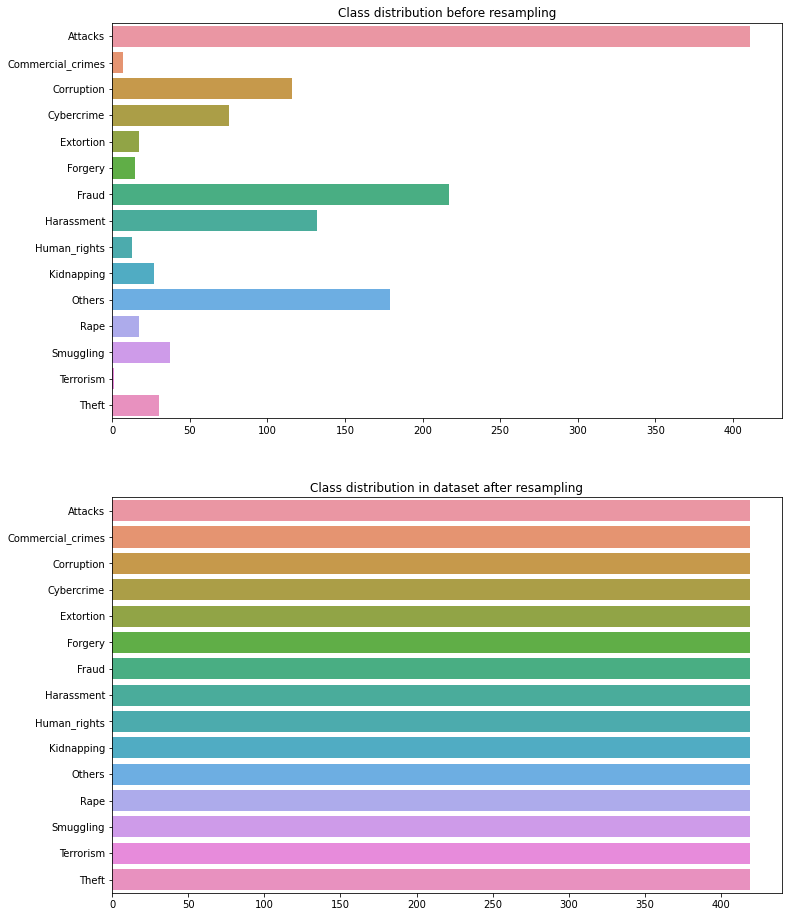

In [254]:
# Setting the figure size
fig = plt.figure(figsize=(12,16))

# Setting the subplots
(ax_test, ax_train) = fig.subplots(ncols=1, nrows=2)

# Plotting bar graph
g1 = sns.barplot(x=y.sum(axis=0), y=mlb.classes_, ax=ax_test)
g2 = sns.barplot(x=y_tfidf_ros.sum(axis=0), y=mlb.classes_, ax=ax_train)

# Setting the title
g1.set_title("Class distribution before resampling")
g2.set_title("Class distribution in dataset after resampling")
plt.show()

- <H4> SPLITTING THE DATASET

In machine learning or any data specific task, we should partition the data correctly. For the model to generalize well, we split the data into two parts, one designed for training and another one for testing. In this case, we will train the model on 75% of the training data and test that model on the remaining 25% data. This will also help to reduce overfitting since we will be validating the model on the data it would not have seen in training phase, which will help in boosting the test performance.

In [255]:
# Splitting the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_ros, y_tfidf_ros, test_size=0.25, random_state=9000)

print('Shape of training dataset  :', X_train.shape, y_train.shape)
print('Shape of testing dataset   :', X_test.shape, y_test.shape)

Shape of training dataset  : (4713, 21922) (4713, 15)
Shape of testing dataset   : (1572, 21922) (1572, 15)


- <H4> WHICH CLASSIFIER IS BEST FOR THIS SCENARIO?

In [256]:
# Naive Bayes classifier for multinomial models
nb = MultinomialNB()

# k-nearest neighbors classifier
knn = KNeighborsClassifier()

# Linear Support Vector Classifier
svc = LinearSVC()

# Logistic Regression classifier
logit = LogisticRegression()

# Perceptron classifier
per = Perceptron()

# Decision Tree classifier
dt = DecisionTreeClassifier()

# Random Forest classifier
rf = RandomForestClassifier()

# Stochastic Gradient Descent classifier
sgd = SGDClassifier()

# Running a loop through every classifier mentioned above
for classifier in [nb, knn, svc, logit, per, dt, rf, sgd]:
    
    # One-vs-the-rest (OvR) multiclass strategy
    clf = OneVsRestClassifier(classifier)
    
    # Building the model on training dataset
    clf.fit(X_train, y_train)
    
    print("Classifier: ", classifier.__class__.__name__)
    print("Mean Accuracy: {}".format(clf.score(X_train, y_train)))
    print("\n")

Classifier:  MultinomialNB
Mean Accuracy: 0.36770634415446635


Classifier:  KNeighborsClassifier
Mean Accuracy: 0.8996392955654573


Classifier:  LinearSVC
Mean Accuracy: 0.9993634627625716


Classifier:  LogisticRegression
Mean Accuracy: 0.7596011033312116


Classifier:  Perceptron
Mean Accuracy: 0.9993634627625716


Classifier:  DecisionTreeClassifier
Mean Accuracy: 1.0


Classifier:  RandomForestClassifier
Mean Accuracy: 1.0


Classifier:  SGDClassifier
Mean Accuracy: 0.9985147464460005




<center><div class="alert alert-success">Therefore, we will go with Random Forest. Since, Random Forest is a good model if we want high performance with less need for interpretation.

But first, let us check, how random-forest performs, when we use cross validation.

- <h4> K-FOLD CROSS VALIDATION

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's imagine we would split our data into 10 folds (K = 10). Our random forest model would be trained and evaluated 10 times, using a different fold for evaluation everytime, while it would be trained on the remaining 9 folds. The result of our K-Fold Cross Validation example would be an array that contains 10 different scores.

In [257]:
# A random forest classifier
rf = RandomForestClassifier(n_estimators=100)

# Evaluate score by cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("\nMean:", scores.mean())
print("\nStandard Deviation:", scores.std())

Scores: [0.91737288 0.90677966 0.90254237 0.90658174 0.90021231 0.91507431
 0.92356688 0.91932059 0.93842887 0.87898089]

Mean: 0.910886052034978

Standard Deviation: 0.015122985406547523


<h2> RANDOM FOREST

### What is Random Forest?

>Random forest is a supervised learning algorithm. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

### Why is Random Forest So Cool?
1. **Impressive in Versatility**: It can handle binary features, categorical features, and numerical features. 
2. **Parallelizable**: They are parallelizable, meaning that we can split the process to multiple machines to run.
3. **Great with High dimensionality**: Random forests is great with high dimensional data since we are working with subsets of data.
4. **Quick Prediction/Training Speed**: It is faster to train than decision trees because we are working only on a subset of features in this model.
5. **Robust to Outliers and Non-linear Data**: Random forest handles outliers by essentially binning them. It is also indifferent to non-linear features.
6. **Handles Unbalanced Data**: It has methods for balancing error in class population unbalanced data sets. 
7. **Low Bias, Moderate Variance**: We average all the trees in random forest, we average the variance as well so that we have low bias & moderate variance model.

#### WORKING OF A RANDOM FOREST ALGORITHM

We can understand the working of Random Forest algorithm with the help of following steps:

- **Step 1** : First, start with the selection of random samples from a given dataset.

- **Step 2** : Next, this algorithm will construct a decision tree for every sample. Then it will get the prediction result from every decision tree.

- **Step 3** : In this step, voting will be performed for every predicted result.

- **Step 4** : At last, select the most voted prediction result as the final prediction result.

In [258]:
# A random forest classifier
random_forest = RandomForestClassifier(n_estimators=300,
                                       max_features='auto',
                                       min_samples_split = 2,
                                       min_samples_leaf = 1,
                                       random_state=1,
                                       n_jobs=-1)

# Build a forest of trees from the training set
random_forest.fit(X_train, y_train)

# Predict class for X_test
y_prediction = random_forest.predict(X_test)

# Accuracy Score
print("Accuracy score:", round(accuracy_score(y_test, y_prediction), 4)*100, "%")

Accuracy score: 92.11 %


<center><div class="alert alert-success">After evaluating our model on testing dataset, the Accuracy came out to be <b>92%</b> which is quite impressive. 

- <h4> PREDICT LABELS

In [259]:
# Generate output predictions
predicted_classes = random_forest.predict(X_test)

- <h4> CLASSIFICATION REPORT

Classification report will help us in identifying the misclassified classes in more detail. We will be able to observe for which class the model performed bad out of the given classes.

In [260]:
# text report showing the main classification metrics
print(classification_report(y_test, 
                            predicted_classes, 
                            target_names=mlb.classes_, 
                            digits=4))

                   precision    recall  f1-score   support

          Attacks     1.0000    0.2752    0.4317       109
Commercial_crimes     1.0000    1.0000    1.0000        90
       Corruption     1.0000    0.9619    0.9806       105
       Cybercrime     1.0000    1.0000    1.0000        98
        Extortion     1.0000    1.0000    1.0000       121
          Forgery     1.0000    1.0000    1.0000        98
            Fraud     1.0000    0.7477    0.8557       111
       Harassment     0.9524    0.9804    0.9662       102
     Human_rights     1.0000    1.0000    1.0000        94
       Kidnapping     1.0000    1.0000    1.0000       105
           Others     0.9783    0.8911    0.9326       101
             Rape     1.0000    1.0000    1.0000       114
        Smuggling     1.0000    1.0000    1.0000       119
        Terrorism     1.0000    1.0000    1.0000       104
            Theft     1.0000    1.0000    1.0000       101

        micro avg     0.9952    0.9211    0.9567      

> As we can see from the above classification report that the precision is good in almost all of the categories. But if we take a look at recall and f1-score of Attacks, Fraud and Others then we can see that these are the categories assiigned to maximum number of articles. If we further divide Attacks and Fraud categories and add some new categories then we will be able to improve the accuracy of our model.

- <h4> INVERSE TRANSFORM

In [261]:
# Resampling decomposed classes
X, y = ros.fit_resample(X_tfidf_ros,y_tfidf_ros)

# Resample the dataset
X_tfidf_ros, y_tfidf_ros = ros.fit_sample(X_tfidf, y)

print('Shape of new dataset  :', X_tfidf_ros.shape, y_tfidf_ros.shape)

Shape of new dataset  : (1302, 21922) (1302, 15)


In [262]:
# Inverse transforming while predicting on orignal dataset
df['predicted_category'] = mlb.inverse_transform(random_forest.predict(X_tfidf_ros))

In [263]:
# Brininging out categories from the list 
df['predicted_category'] = df['predicted_category'].apply(lambda x: x[0] if len(x) > 0 else None)

# Brininging out categories from the list
df['category'] = df['category'].apply(lambda x: x[0] if len(x) > 0 else "")

In [264]:
df[['category', 'predicted_category']].head(10)

,category,predicted_category
0,Others,Others
1,Attacks,Attacks
2,Attacks,Attacks
3,Attacks,Attacks
4,Attacks,Attacks
5,Kidnapping,Kidnapping
6,Attacks,None
7,Attacks,Attacks
8,Harassment,Harassment
9,Attacks,Attacks


In [265]:
df.head(10)

,parent_urls,sub_url,downloaded_date,publish_date,body,image_link,summary,article_keywords,clean_article,organisation,...,pi_alias,pi_dob,pi_location,pi_party,black_list,blue_list,red_list,yellow_list,risk_type,predicted_category
0,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-04-17,2020-05-01,"This story is from January 13, 2020Manipur Sti...","https://static.toiimg.com/thumb/msid-47529300,...","This story is from January 13, 2020Manipur Sti...","[story, january, manipur, stir, threat, l, sot...",story january manipur stir threat l sotinkumar...,NA,...,[],[],[],[],False,False,False,True,Yellow List,Others
1,https://timesofindia.indiatimes.com/city/agartala,https://timesofindia.indiatimes.com/city/agart...,2020-03-31,2020-05-01,"In a barbaric incident, a 6-year-old girl was...","https://static.toiimg.com/thumb/msid-74241246,...","In a barbaric incident, a 6-year-old girl was...","[barbaric, incident, yearold, girl, murder, ra...",barbaric incident yearold girl murder rap year...,[Kachakla Tripura],...,[],[],[],[],False,False,False,True,Yellow List,Attacks
2,https://timesofindia.indiatimes.com/city/jammu,https://timesofindia.indiatimes.com/city/jammu...,2020-03-31,2020-05-01,"District police, Samba claimed to have solved...","https://static.toiimg.com/thumb/msid-74207015,...","District police, Samba claimed to have solved...","[district, police, samba, claim, solve, blind,...",district police samba claim solve blind murder...,"[Samba, Patyari Katlan Tehsil]",...,[],[],[],[],False,False,False,True,Yellow List,Attacks
3,NaN,https://www.indiatoday.in/crime/story/teenager...,2020-04-17,2020-04-05,The victim died during treatment at the Child ...,https://akm-img-a-in.tosshub.com/indiatoday/im...,The victim died during treatment at the Child ...,"[victim, die, treatment, child, pgi, hospital,...",victim die treatment child pgi hospital yearol...,"[The Child Pgi Hospital, Salarpur]",...,[],[],[],[],False,False,False,True,Yellow List,Attacks
4,NaN,https://gulfnews.com/world/asia/india/india-se...,2020-04-17,2019-10-29,Sentenced to death for a murder and rape but s...,https://imagevars.gulfnews.com/2018/12/18/pill...,Sentenced to death for a murder and rape but s...,"[sentence, death, murder, rape, say, link, mur...",sentence death murder rape say link murdersa b...,"[Murdersa, Image Credit Agencyserial, Vi, Hind...",...,[],[],[],[],False,False,False,True,Yellow List,Attacks
5,https://timesofindia.indiatimes.com/city/imphal,https://timesofindia.indiatimes.com/city/impha...,2020-03-02,2020-05-01,Various units of Left parties in Manipur on S...,"https://static.toiimg.com/thumb/msid-47529300,...",Various units of Left parties in Manipur on S...,"[various, units, leave, party, manipur, sunday...",various units leave party manipur sunday threa...,NA,...,[],[],[],[],False,False,True,False,Red List,Kidnapping
6,https://timesofindia.indiatimes.com/city/rajkot,https://timesofindia.indiatimes.com/city/rajko...,2020-04-17,2020-05-01,Rajkot A 16-year-old rape survivor attempted s...,"https://static.toiimg.com/thumb/msid-47529300,...",Rajkot A 16-year-old rape survivor attempted s...,"[rajkot, yearold, rape, survivor, attempt, sui...",rajkot yearold rape survivor attempt suicide j...,"[Pachasvadia Quarters, Sir T Hospital, Palitana]",...,[],[],[],[],False,False,False,True,Yellow List,None
7,https://timesofindia.indiatimes.com/city/meerut,https://timesofindia.indiatimes.com/city/meeru...,2020-03-13,2020-05-01,Bijnor A man who allegedly killed his grandfat...,"https://static.toiimg.com/thumb/msid-47529300,...",Bijnor A man who allegedly killed his grandfat...,"[bijnor, man, allegedly, kill, grandfather, pr...",bijnor man allegedly kill grandfather property...,[Nahtaur],...,[],[],[],[],False,False,False,True,Yellow List,Attacks
8,https://timesofindia.indiatimes.com/city/trichy,https://timesofindia.indiatimes.com/city/trich...,2020-03-13,2020-05-01,A 34-year-old man was arrested under Protecti...,

___

<div class="alert alert-block alert-success">Finally, we built the Machine Learning model to identify crime category from the news articles.

___

<H3> PROJECT SCOPE

<div class="alert alert-block alert-info">
    
1. Can track human trafficking mafia networks where women are sold and abused.
    
2. Can identify which politician has link with such network.
    
3. Can access records of all criminals in database from all random cases not linked with above
two, under yellow category.
    
4. Can develop a system to warn ladies about crime associated with name, photo and
location.

<center> <h1> END